In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

def print_central_tendency(sample=list()):
#     print(f"mean: {np.mean(sample)}, variance: {np.var(sample, ddof=1)} -- [sample]")
    print(f"mean: {np.mean(sample)}, variance: {np.var(sample)}")
    print(f"median: {np.median(sample)}")
#     print(f"mode: {statistics.mode(sample)}")

    
def print_variability(sample=list()):
    print(f"variance: {np.var(sample)}")
#     print(f"variance: {np.var(sample, ddof=1)}")
    print(f"standard variation: {np.std(sample)}")
#     print(f"standard variation: {np.std(sample, ddof=1)}")
    print(f"range: [{np.min(sample).round(3)},{np.max(sample).round(3)}]")
    print(f"IQR: {np.quantile(sample, [0.25, 0.75])}")
    print(f"25 Percentile: {np.percentile(sample, 25)}")
    print(f"50 Percentile: {np.percentile(sample, 50)}")
    print(f"75 Percentile: {np.percentile(sample, 75)}")
    
def print_shape(y=stats.norm.rvs(0,1,100)):
    print(f"skewness: {stats.skew(y)}")
    print(f"kurtosis: {stats.kurtosis(y)}")
    
def print_sample_info(sample=list()):
    print()
    print_central_tendency(sample)
    print_variability(sample)
    print_shape(sample)
    
def print_ideal_info(mean = 0, variance = 1):
    print()
    print(f"mean: {mean}, variance: {variance}")
    
def print_pdf_figure(x=[0], y=[1.0], name="Statistical Distribution", fmt=""):
    plt.figure()
    
    if fmt=="":
        plt.plot(x, y)
    else:
        plt.plot(x, y, fmt)
        
    plt.xlim(x.min(), x.max())
#     plt.ylim(0, np.min([y.max() * 1.2, 1]))
    plt.ylim(0, y.max() * 1.2)
    plt.grid()
    plt.legend([name], loc="best")
    

    
sample_size = 1000
random_seed = 123

## Uniform Distribution (Continuous Probability Distribution)
$X = {\{x\,|\,start \le x \le end\}}$
<br/>
<br/>
$X$ ~ $Uniform(start,\,end)$

### pdf(probability density function)
$P(X=x) = \frac{1}{|end\,-\,start|}$
<br/>
<br/>
$E(X) = {(start\,+\,end) \over 2}$
<br/>
<br/>
$V(X) = {(end\,-\,start)^2 \over 12}$


mean: 6.0, variance: 12.0

mean: 5.992476372483017, variance: 11.690979667662095
median: 5.8638128921661
variance: 11.690979667662095
standard variation: 3.419207461921855
range: [0.001,11.987]
IQR: [3.1725611  8.85683986]
25 Percentile: 3.1725611003472642
50 Percentile: 5.8638128921661
75 Percentile: 8.856839863022476
skewness: 0.030040541083377552
kurtosis: -1.1302936417747207


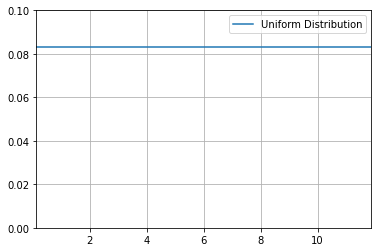

In [3]:
# Continuous Uniform Distribution - [start, end] 
# X ~ U(start, end)
start = 0
end = 12
sample_size = 1000
random_seed = 123

sample_uniform = stats.uniform.rvs(loc=start, scale=end, size=sample_size, random_state=random_seed)

print_ideal_info(mean = (start + end) / 2, variance = ((end - start) ** 2) / 12)
print_sample_info(sample_uniform)

x = np.linspace(
    stats.uniform.ppf(0.01, loc=start, scale=end), 
    stats.uniform.ppf(0.99, loc=start, scale=end), 
    sample_size
)
y = stats.uniform.pdf(x, loc=start, scale=end)

print_pdf_figure(x=x, y=y, name="Uniform Distribution")

### Bernoulli Distribution
$X = \{0, 1\}$  : *0: failed, 1: success*
<br/>
<br/>
$X$ ~ $Ber(p)$

#### pmf(probability mass function)
$P(X=0)=1-p$
<br/>
$P(X=1)=p$
<br/>
<br/>
$E(X) = p$
<br/>
<br/>
$V(X) = p\,(1-p)$


mean: 0.4, variance: 0.24

mean: 0.389, variance: 0.23767899999999992
median: 0.0
variance: 0.23767899999999992
standard variation: 0.4875233327749554
range: [0,1]
IQR: [0. 1.]
25 Percentile: 0.0
50 Percentile: 0.0
75 Percentile: 1.0
skewness: 0.45536282076262585
kurtosis: -1.792644701467104


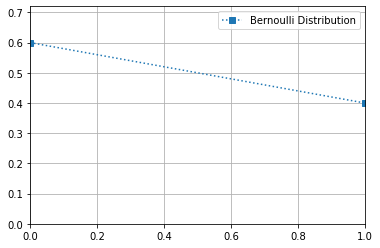

In [4]:
# Bernoulli Distribution
# -- Bernoulli Trial
# X ~ Ber(p)
p = 0.4
sample_size = 1000
random_seed = 123

sample_bernoulli = stats.bernoulli.rvs(p, size=sample_size, random_state=random_seed)

print_ideal_info(mean=p, variance=p * (1 - p))
print_sample_info(sample_bernoulli)

x = np.arange(
    stats.bernoulli.ppf(0.01, p), 
    stats.bernoulli.ppf(0.99, p) + 1
)
y = stats.bernoulli.pmf(x, p)

print_pdf_figure(x=x, y=y, name="Bernoulli Distribution", fmt="s:")

## Binomial Distribution
> with replacements in bernoulli trial
<br/>
> with predefined # of bernoulli trials, n

$X = \{0, 1, 2, ... , n\}$  : *success count of bernoulli trials*
<br/>
<br/>
$X$ ~ $Bin(n,p)$

### pmf(probability mass function)
$\begin{aligned} P(X=x) = \binom{n}{x}\cdot{p}^{x}\cdot{(1-p)}^{n-x} \end{aligned}$
<br/>
<br/>
$\begin{aligned} E(X) = n \cdot p \end{aligned}$
<br/>
<br/>
$\begin{aligned} V(X) = n \cdot p\cdot(1-p) \end{aligned}$


mean: 51.456, variance: 23.875584

mean: 51.382, variance: 24.756076
median: 52.0
variance: 24.756076
standard variation: 4.975547809035705
range: [35,66]
IQR: [48. 55.]
25 Percentile: 48.0
50 Percentile: 52.0
75 Percentile: 55.0
skewness: -0.1540263848088136
kurtosis: 0.13175745167957498


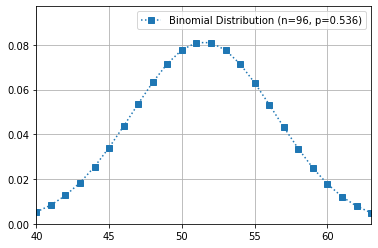

In [5]:
# Binomial Distribution
# -- with replacements in bernoulli trial & with predefeind # of bernoulli trials
# X ~ Bin(n,p)
max_n = 100
min_n = 30
min_p = 0.1
max_p = 0.9

n = np.random.randint(min_n, max_n)
p = round(np.random.random() * (max_p - min_p) + min_p, 3)

sample_size = 1000
random_seed = 123

sample_binomial = stats.binom.rvs(n, p, size=sample_size, random_state=random_seed)

print_ideal_info(mean = n*p, variance = n*p*(1-p))
print_sample_info(sample_binomial)

x = np.arange(
    stats.binom.ppf(0.01, n, p), 
    stats.binom.ppf(0.99, n, p) + 1
)
y = stats.binom.pmf(x, n, p)

print_pdf_figure(x=x, y=y, name=f"Binomial Distribution (n={n}, p={p})", fmt="s:")

## Negative Binomial Distribution
> with replacements in bernoulli trial
<br/>
> with predefined # of failure, r

$X = \{0, 1, 2, ...\}$  : *success count of bernoulli trials*
<br/>
<br/>
$X$ ~ $NB(r,p)$

### pmf(probability mass function)
$\begin{aligned}\mathrm P(X=x)=\binom{x + r - 1}{r - 1}\cdot{(1-p)}^{r}\cdot{p}^{x} \end{aligned}$
<br/>
<br/>
$\begin{aligned}\mathrm E(X) = \frac{r \cdot p}{1 - p} \end{aligned}$
<br/>
<br/>
$\begin{aligned}\mathrm V(X) = {r \cdot p \over (1 - p)^2} \end{aligned}$
<br/>
<br/>

<details>
<summary>Proof</summary>
<p>

$\begin{aligned} f_m(z) &{}= \sum_{k=0}^\infty \binom{k+m}{m} z^k \\&{}= \sum_{k=0}^\infty \binom{k+m-1}{m-1}z^k + \binom{k-1+m}{m} z^k  \\{}&= f_{m-1}(z) + z \sum_{k=1}^\infty \binom{k-1+m}{m} z^{k-1} \\{}&= f_{m-1}(z) + z f_m(z) \end{aligned}$
<br/>
<br/>
$\begin{aligned} \therefore f_m(z) = \frac{f_{m-1}(z)}{1-z} \end{aligned}$
<br/>
<br/>
$\begin{aligned} f_0(z) = \sum_{k=0}^\infty \binom{k}{0} z^k = \frac{1}{1-z} \end{aligned}$
<br/>
<br/>
$\begin{aligned} \therefore f_m(z) = (1-z)^{-(m+1)} \end{aligned}$
<br/>
<br/>
$\begin{aligned} \sum_{x=0}^\infty \operatorname{P}[X=x] &{}= \sum_{x=0}^\infty \binom{x + r - 1}{r - 1} p^x (1-p)^{r}
\\&{}= (1-p)^{r} \sum_{x=0}^\infty \binom{x + r - 1}{r - 1} p^x 
\\&{}= (1-p)^{r} f_{r-1}(p)
\\&{}= (1-p)^{r} (1-p)^{-(r-1+1)}
\\&{}= 1
\end{aligned}$
<br/>
<br/>
$\begin{aligned} \operatorname{E}[X] &{}= \sum_{x=0}^\infty x \binom{x + r - 1}{r - 1} p^x (1-p)^{r}
\\&{}= \sum_{x=0}^\infty (x + r - r) \binom{x + r - 1}{r - 1} p^x (1-p)^{r} 
\\&{}= \sum_{x=0}^\infty (x + r) \binom{x + r - 1}{r - 1} p^x (1-p)^{r} - \sum_{x=0}^\infty r \binom{x + r - 1}{r - 1} p^x (1-p)^{r} 
\\&{}= \sum_{x=0}^\infty r\frac{(x + r)}{r} \binom{x + r - 1}{r - 1} p^x (1-p)^{r} - r \sum_{x=0}^\infty \binom{x + r - 1}{r - 1} p^x (1-p)^{r} 
\\&{}= r \sum_{x=0}^\infty \binom{x + r}{r} p^x (1-p)^{r} - r (1-p)^{r} \sum_{x=0}^\infty \binom{x + r - 1}{r - 1} p^x
\\&{}= r \cdot (1-p)^{r} \sum_{x=0}^\infty \binom{x + r}{r} p^x - r f_{r-1}(p) (1-p)^{r}
\\&{}= r \cdot (1-p)^{r} \cdot f_{r}(p) - r
\\&{}= r \cdot (1-p)^{r} \cdot (1-p)^{-(r+1)} - r
\\&{}= \frac{r}{(1-p)} - r
\\&{}= \frac{r \cdot p}{1 - p} \end{aligned}$
<br/>
<br/>
$\begin{aligned} \operatorname{V}[X] &{}= E(X^2) - E(X)^2
\\&{}= \sum_{x=0}^\infty x^{2} \binom{x + r - 1}{r - 1} p^x (1-p)^{r} - E(X)^2
\\&{}= \sum_{x=0}^\infty x^{2} \binom{x + r - 1}{r - 1} p^x (1-p)^{r} - {\frac{rp}{(1-p)}}^2
\\&{}= \sum_{x=0}^\infty x(x+r-r) \binom{x + r - 1}{r - 1} p^x (1-p)^{r} - {\frac{rp}{(1-p)}}^2
\\&{}= \sum_{x=0}^\infty x(x+r) \binom{x + r - 1}{r - 1} p^x (1-p)^{r} - \sum_{x=0}^\infty r\cdot x \binom{x + r - 1}{r - 1} p^x (1-p)^{r} - {\frac{rp}{(1-p)}}^2
\\&{}= \sum_{x=0}^\infty \frac{x\cdot(x+r)\cdot r}{r} \binom{x + r - 1}{r - 1} p^x (1-p)^{r} - r \cdot E(X) - {\frac{rp}{(1-p)}}^2
\\&{}= r \sum_{x=0}^\infty x \binom{x + r}{r} p^x (1-p)^{r} - r \cdot \frac{rp}{(1-p)} - {\frac{rp}{(1-p)}}^2
\\&{}= \frac{r}{(1-p)} \sum_{x=0}^\infty x \binom{x + r}{r} p^x (1-p)^{r + 1} - \frac{r^{2}p}{(1-p)} - \frac{r^{2}p^{2}}{(1-p)^2}
\\&{}= \frac{r}{(1-p)} E(X;r+1) - \frac{r^{2}p \cdot (1-p)}{(1-p)^2} - \frac{r^{2}p^{2}}{(1-p)^2}
\\&{}= \frac{r}{(1-p)} \cdot \frac{(r+1)\cdot p}{(1-p)} - \frac{r^{2}p - r^{2}p^{2}}{(1-p)^2} - \frac{r^{2}p^{2}}{(1-p)^2}
\\&{}= \frac{r^{2}p+rp}{(1-p)^{2}}- \frac{r^{2}p - r^{2}p^{2}}{(1-p)^2} - \frac{r^{2}p^{2}}{(1-p)^2}
\\&{}= \frac{r^{2}p+rp - r^{2}p + r^{2}p^{2} - r^{2}p^{2}}{(1-p)^2}
\\&{}= \frac{rp}{(1-p)^2} \end{aligned}$ 
</p>
</details>


mean: 10.0, variance: 20.0

mean: 9.972, variance: 19.091216
median: 10.0
variance: 19.091216
standard variation: 4.369349608351339
range: [0,31]
IQR: [ 7. 13.]
25 Percentile: 7.0
50 Percentile: 10.0
75 Percentile: 13.0
skewness: 0.5783491185503505
kurtosis: 0.4285125288491374


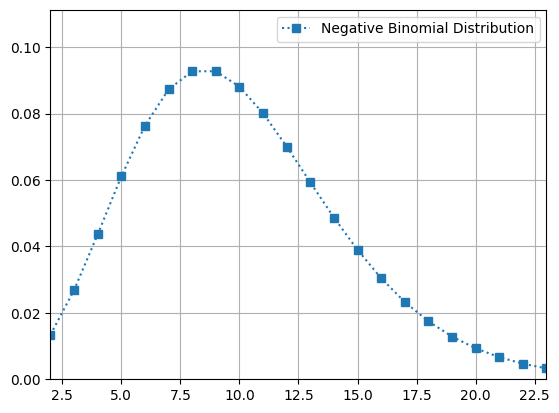

In [4]:
# Negative Binomial Distribution
# -- with replacements in bernoulli trial & with predefined # of success
# X ~ NB(r,p)
r = 10  # r: predefined number of success
p = 0.5
sample_size = 1000
random_seed = 123

sample_negative_binomial = stats.nbinom.rvs(r, p, size=sample_size, random_state=random_seed)

print_ideal_info(mean = p / (1 - p) * r, variance = p * r / (1 - p) ** 2)
print_sample_info(sample_negative_binomial)

x = np.arange(
    stats.nbinom.ppf(0.01, r, p), 
    stats.nbinom.ppf(0.99, r, p) + 1
)
y = stats.nbinom.pmf(x, r, p)

print_pdf_figure(x=x, y=y, name="Negative Binomial Distribution", fmt="s:")

## Geometric Distribution
> with replacements in bernoulli trial
<br/>
> with predefined # of success, r = 1

$X = \{1, 2, ...\}$  : *total count of bernoulli trials*
<br/>
$Y = X - 1 = \{0, 1, ...\}$  : *failed count of bernoulli trials*
<br/>
<br/>
$X$ ~ $Geometric(p)$
<br/>
<br/>
$NB(1,p) \equiv Geometric(p)$

### pmf(probability mass function)
$\begin{aligned} \mathrm P(X=x)={(1-p)}^{x - 1}\cdot{p} \end{aligned}$
<br/>
<br/>
$\begin{aligned} \mathrm E(X) = \frac{1}{p} \end{aligned}$
<br/>
<br/>
$\begin{aligned} \mathrm V(X) = {1\,-\,p \over p^2} \end{aligned}$
---
$\begin{aligned} \mathrm P(Y=y)={(1-p)}^{y}\cdot{p} \end{aligned}$
<br/>
<br/>
$\begin{aligned} \mathrm E(Y) = \frac{1 - p}{p} \end{aligned}$
<br/>
<br/>
$\begin{aligned} \mathrm V(X) = {1\,-\,p \over p^2} \end{aligned}$
<br/>
<br/>

<details>
<summary>Proof</summary>
<p>
        
${\begin{aligned}\mathrm {E} (Y)&{}=\sum _{y=0}^{\infty }(1-p)^{y}p\cdot y\\&{}=p\sum _{y=0}^{\infty }(1-p)^{y}y\\&{}=p(1-p)\sum _{y=0}^{\infty }(1-p)^{y-1}\cdot k\\&{}=p(1-p)\left[{\frac {d}{dp}}\left(-\sum _{y=0}^{\infty }(1-p)^{y}\right)\right]\\&{}=p(1-p){\frac {d}{dp}}\left(-{\frac {1}{p}}\right)={\frac {1-p}{p}}\end{aligned}}$
        
        
</p>
</details>


mean: 2.5, variance: 3.749999999999999

mean: 2.486, variance: 3.741804
median: 2.0
variance: 3.741804
standard variation: 1.9343743174473755
range: [1,14]
IQR: [1. 3.]
25 Percentile: 1.0
50 Percentile: 2.0
75 Percentile: 3.0
skewness: 1.9253333925563656
kurtosis: 4.432024446405019


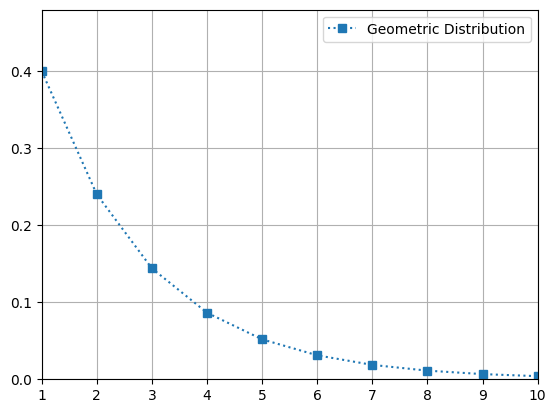

In [5]:
# Geometric Distribution ~= NB(1, p)
# -- with replacements in bernoulli trial & with predefined # of success = 1
# X ~ Geometric(p)
p = 0.4
sample_size = 1000
random_seed = 123

sample_geometric = stats.geom.rvs(p, size=sample_size, random_state=random_seed)

print_ideal_info(mean = 1 / p, variance = (1 - p) / (p ** 2))
print_sample_info(sample_geometric)

x = np.arange(
    stats.geom.ppf(0.01, p), 
    stats.geom.ppf(0.99, p) + 1
)
y = stats.geom.pmf(x, p)

print_pdf_figure(x=x, y=y, name="Geometric Distribution", fmt="s:")

## Hypergeometric Distribution
> with no replacements in bernoulli trial
<br/>
> with predefined # of bernoulli trials, n

$X = \{0, 1, 2, ..., n\}$  : *success count of bernoulli trials*
<br/>
<br/>
$X$ ~ $HG(N,n,K)$
<br/>
> N : Population size<br/>
> n : Sample size<br/>
> K : Number of success state in population

### pmf(probability mass function)
$\begin{aligned} P(X=x)=\frac{\binom{K}{x}\binom{N-K}{n-x}}{\binom{N}{n}} \end{aligned}$
<br/>
<br/>
$\begin{aligned} E(X) = n\cdot{K \over N} \end{aligned}$
<br/>
<br/>
$\begin{aligned} V(X) = n\cdot{K \over N}\cdot{N - K \over N}\cdot{N - n \over N - 1} \end{aligned}$

In [ ]:
# Hypergeometric Distribution
# -- with no replacements, bernoulli trial & with predefined # of bernoulli trials
# X ~ HG(N, n, K)
N = 10000
K = 500
n = 100
sample_size = 1000
random_seed = 123

sample_hypergeometric = stats.hypergeom.rvs(N, n, K, size=sample_size, random_state=random_seed)

print_ideal_info(mean = n * K / N, variance = n * K / N * (N - K) / N * (N - n) / (N - 1))
print_sample_info(sample_hypergeometric)

x = np.arange(
    stats.hypergeom.ppf(0.01, N, n, K), 
    stats.hypergeom.ppf(0.99, N, n, K) + 1
)
y = stats.hypergeom.pmf(x, N, n, K)

print_pdf_figure(x=x, y=y, name="Hypergeometric Distribution", fmt="s:")

# Negative Hypergeometric Distribution
# -- with no replacements in bernoulli trial & with predefined # of success
# X ~ NHG(N, r, K)

## Negative Hypergeometric Distribution
> with no replacements in bernoulli trial
<br/>
> with predefined # of failed counts, r

$X = \{0, 1, 2, ..., n\}$  : *success count of bernoulli trials*
<br/>
<br/>
$X$ ~ $NHG(N,r,K)$
<br/>
> N : Population size<br/>
> r : failed count<br/>
> K : Number of success state in population

### pmf(probability mass function)
$\begin{aligned} P(X=x)=\frac{\binom{x+r-1}{r-1}\binom{N-r-x}{K-x}}{\binom{N}{K}} \end{aligned}$
<br/>
<br/>
$\begin{aligned} E(X) = r\cdot{K \over N-K+1} \end{aligned}$
<br/>
<br/>
$\begin{aligned} V(X) = r\cdot \frac{(N+1) K}{(N-K+1)(N-K+2)}\cdot[1-\frac{r}{N-K+1}] \end{aligned}$

## Poisson Distribution

$X = \{0, 1, 2, ...\}$  : *success count of bernoulli trials*
<br/>
<br/>
$X$ ~ $Pois(\lambda)$
<br/>
> $\lambda$ : Expected value of success count

### pmf(probability mass function)
$\begin{aligned} P(X=x)={e}^{-\lambda}\,\frac{{\lambda}^{x}}{x!} \end{aligned}$

> $\begin{aligned}e^x = \sum_{k=0}^{\infty} \frac{1}{k!}x^k \end{aligned}$

<br/>
$\begin{aligned} E(X) = \lambda \end{aligned}$
<br/>
<br/>
$\begin{aligned} V(X) = \lambda \end{aligned}$


mean: 10, variance: 10

mean: 10.034, variance: 10.036844
median: 10.0
variance: 10.036844
standard variation: 3.168097852024145
range: [2,23]
IQR: [ 8. 12.]
25 Percentile: 8.0
50 Percentile: 10.0
75 Percentile: 12.0
skewness: 0.3081418278949084
kurtosis: 0.053972704446464626


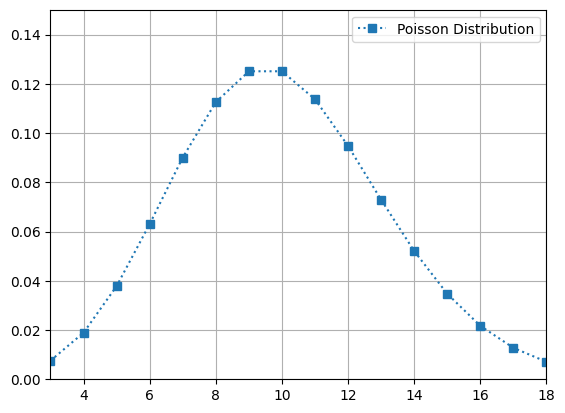

In [6]:
# Poisson Distribution
# X ~ Pois(lambda)

r = 10   # lambda: expected value
sample_size = 1000
random_seed = 123

sample_poisson = stats.poisson.rvs(10, size=sample_size, random_state=random_seed)

print_ideal_info(mean = r, variance = r)
print_sample_info(sample_poisson)

x = np.arange(
    stats.poisson.ppf(0.01, r), 
    stats.poisson.ppf(0.99, r) + 1
)
y = stats.poisson.pmf(x, r)

print_pdf_figure(x=x, y=y, name="Poisson Distribution", fmt="s:")

## Exponential Distribution (Continuous Probability Distribution)

$X = \{x|x\ge0\}$  : waiting time for next success
<br/>
<br/>
$X$ ~ $Exp(\lambda)$
<br/>
> $\lambda$ : Frequency during unit time

### pdf(probability density function)
$\begin{aligned} P(X=x)=\lambda\,{e}^{-\lambda x}\end{aligned}$  $\begin{aligned}(x \gt 0) \end{aligned}$ 

> $\begin{aligned} \int_0^\infty {e^{-x}}\,dx = 1 \end{aligned}$

<br/>
$\begin{aligned} E(X) = {1 \over \lambda} \end{aligned}$
<br/>
<br/>
$\begin{aligned} V(X) = {1 \over \lambda^2} \end{aligned}$


mean: 2.0, variance: 4.0

mean: 3.9966119528274664, variance: 3.9992941979159755
median: 3.341430847857637
variance: 3.9992941979159755
standard variation: 1.9998235416946104
range: [2.0,15.659]
IQR: [2.61408345 4.67935613]
25 Percentile: 2.6140834468384995
50 Percentile: 3.341430847857637
75 Percentile: 4.679356129152408
skewness: 1.8772832515166133
kurtosis: 4.2517554171989795


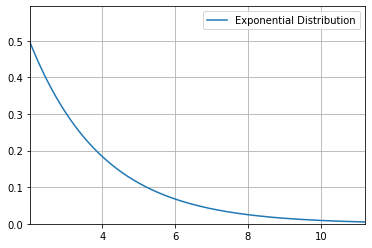

In [3]:
# Exponential Distribution
# X ~ Exp(lambda)

r = 0.5   # lambda: expected value per unit time
sample_size = 1000
random_seed = 123

sample_exponential = stats.expon.rvs(loc=1/r, scale=1/r, size=sample_size, random_state=random_seed)

print_ideal_info(mean = 1 / r, variance = 1 / (r ** 2))
print_sample_info(sample_exponential)

x = np.linspace(
    stats.expon.ppf(0.01, loc=1/r, scale=1/r), 
    stats.expon.ppf(0.99, loc=1/r, scale=1/r), 
    sample_size
)
y = stats.expon.pdf(x, loc=1/r, scale=1/r)

print_pdf_figure(x=x, y=y, name="Exponential Distribution")

## Normal Distribution

$X = \{x|-\infty \lt x \lt \infty \}$
<br/>
<br/>
$X$ ~ $N(\mu,\sigma^2)$

> $\mu$ : Mean<br/>
> $\sigma$ : Variance

### pdf(probability density function)
$\begin{aligned} P(X=x)=\frac{1}{\sqrt{2\pi}\sigma}e^{\frac{-{(x-\mu)^2}}{2\sigma^2}} \end{aligned}$ 

> $\begin{aligned} \int_{-\infty}^{\infty} {e^{-x^2}}\,dx = \sqrt{\pi} \end{aligned}$

<br/>
$\begin{aligned} E(X) = \mu \end{aligned}$
<br/>
<br/>
$\begin{aligned} V(X) = \sigma^2 \end{aligned}$


mean: 0, variance: 1

mean: -0.03956413608079184, variance: 1.0015756952478059
median: -0.0411855552127819
variance: 1.0015756952478059
standard variation: 1.0007875375162332
range: [-3.231,3.572]
IQR: [-0.68455659  0.66886575]
25 Percentile: -0.6845565903657307
50 Percentile: -0.0411855552127819
75 Percentile: 0.6688657477179376
skewness: -0.029040113501244434
kurtosis: -0.025438528777691705


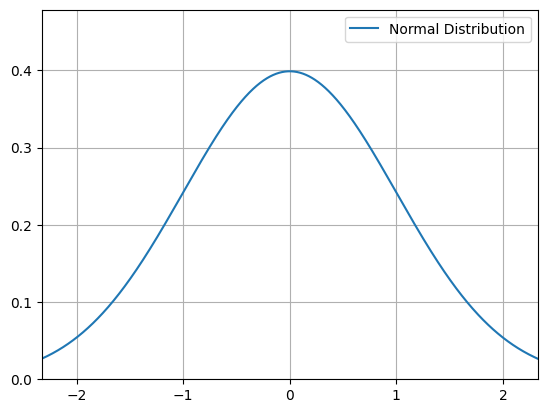

In [7]:
# Normal Distribution
# X ~ N(loc, scale)
mean = 0
scale = 1
sample_size = 1000
random_seed = 123

sample_normal = stats.norm.rvs(loc=mean, scale=scale, size=sample_size, random_state=random_seed)

print_ideal_info(mean = mean, variance = scale**2)
print_sample_info(sample_normal)

x = np.linspace(
    stats.norm.ppf(0.01, loc=mean, scale=scale), 
    stats.norm.ppf(0.99, loc=mean, scale=scale), 
    sample_size
)
y = stats.norm.pdf(x, loc=mean, scale=scale)

print_pdf_figure(x=x, y=y, name="Normal Distribution")

In [8]:
p = 0.6
z = stats.norm.ppf(p)

print(stats.norm.cdf(z))            # cdf: cumulative distribution function
print(stats.norm.sf(z))             # sf: survival function, sf = 1 - cdf
print(stats.norm.ppf(p))            # ppf: percentage point function, ppf = inverse function of cdf
print(stats.norm.isf(1.0 - p))      # isf: inverse function of sf
print(stats.norm.interval(0.95))

0.6
0.4
0.2533471031357997
0.2533471031357997
(-1.959963984540054, 1.959963984540054)


## Standard Normal Distribution

If $\begin{aligned}X\end{aligned}$ ~ $\begin{aligned}N(\mu,\,\sigma^2)\end{aligned}$ and $\begin{aligned}Z=\frac{X\,-\,\mu}{\sigma}\end{aligned}$<br/>
then <br/>
> $Z$ ~ $N(0,\,1)$

### pdf(probability density function)
$\begin{aligned}P(Z=z)=\phi(z)=\frac{1}{\sqrt{2\pi}}e^{\frac{-{z^2}}{2}}\end{aligned}$ 
<br/>

### cdf(cumulative distribution function)
$\begin{aligned}P(Z \lt a)=\Phi(a)=\int_{-\infty}^{a}\phi(z)\,dz=\int_{-\infty}^{a}\frac{1}{\sqrt{2\pi}}e^{\frac{-{z^2}}{2}}\,dz\end{aligned}$  

<br/>
<br/>
$\begin{aligned}E(X) = 0\end{aligned}$
<br/>
<br/>
$\begin{aligned}V(X) = 1\end{aligned}$

### (1 - $\alpha$) Quantile : $Z_\alpha$
$\begin{aligned}\Phi(Z_\alpha) = P(Z \lt Z_\alpha) = 1 - \alpha\end{aligned}$

$\begin{aligned}P(Z \gt Z_\alpha) = \alpha\end{aligned}$

<br/>
        
```python
import scipy.stats as stasts
p = 0.25
z_p = stats.norm.ppf(1 - p, loc=0, scale=1)
z_p_2 = stats.norm.isf(p, loc=0, scale=1)
```

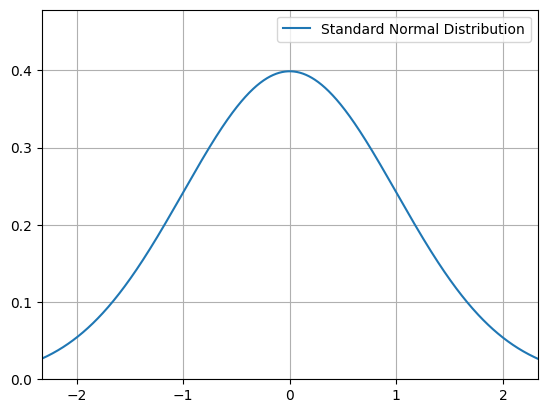

In [11]:
x = np.linspace(
    stats.norm.ppf(0.01, loc=mean, scale=scale), 
    stats.norm.ppf(0.99, loc=mean, scale=scale), 
    sample_size
)
y = stats.norm.pdf(x, loc=mean,scale=scale)

print_pdf_figure(x=x, y=y, name="Standard Normal Distribution")

## Gamma Distribution

$X = \{x|x \ge 0\}$
<br/>
<br/>
$X$ ~ $\Gamma(k, \theta)$

> $k$ : Shape parameter<br/>
> $\theta$ : Scale parameter

### pdf(probability density function)
$\begin{aligned}P(X=x)=f(x;k,\theta)=\frac{1}{\theta^{k}\,\Gamma(k)}x^{k-1}e^{-\frac{x}{\theta}}\end{aligned}$ 

> $\begin{aligned}\Gamma(n)\,=\,(n\,-\,1)!\end{aligned}$ <br/><br/>
> $\begin{aligned}\Gamma(z)\,=\,\int_{0}^{\infty}x^{z\,-\,1}e^{-x}\,dx\,,\,\,\,\,Re(z)\gt0\end{aligned}$

<br/>
$E(X) = k\,\theta$
<br/>
<br/>
$V(X) = k\,\theta^2$


mean: 20, variance: 40

mean: 20.212327656309725, variance: 38.561634658433505
median: 19.672629559404808
variance: 38.561634658433505
standard variation: 6.20980149911682
range: [5.398,51.132]
IQR: [15.82164872 23.99085237]
25 Percentile: 15.821648716915835
50 Percentile: 19.672629559404808
75 Percentile: 23.99085237074371
skewness: 0.5503509002818288
kurtosis: 0.5455691110631484


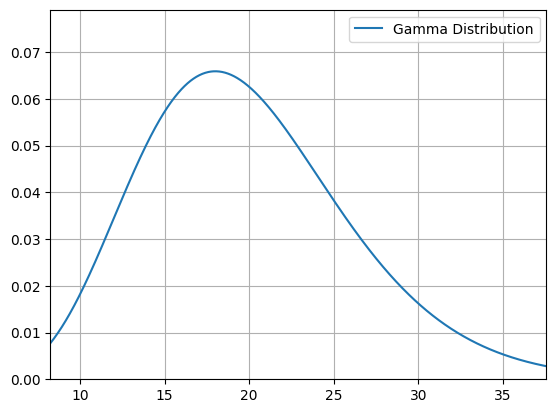

In [12]:
# Gamma Distribution
# X ~ Gamma(k, theta)
k = 10                  # shape parameter
theta = 2               # scale parameter
sample_size = 1000
random_seed = 123

sample_gamma = stats.gamma.rvs(a=k, scale=theta, size=sample_size, random_state=random_seed)

print_ideal_info(mean = k * theta, variance = k * theta ** 2)
print_sample_info(sample_gamma)

x = np.linspace(
    stats.gamma.ppf(0.01, a=k, scale=theta), 
    stats.gamma.ppf(0.99, a=k, scale=theta), 
    sample_size
)
y = stats.gamma.pdf(x, a=k, scale=theta)

print_pdf_figure(x=x, y=y, name="Gamma Distribution")

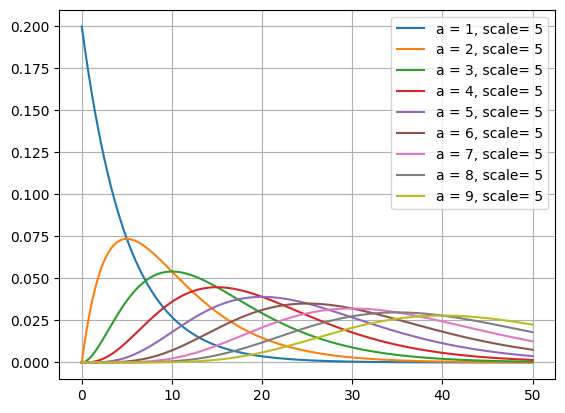

In [13]:
start = 1
end = 10

scale = np.random.randint(1, 10)

x = np.linspace(0, 50, sample_size)
# plt.xlim(x.min(), x.max())
for a in range(start,end):
    y = stats.gamma.pdf(x, a=a, scale=scale)
    plt.plot(x, y)
plt.legend((f"a = " + pd.Series(np.arange(start,end)).astype('str') + f", scale= {scale}").values, loc="best")
plt.grid()

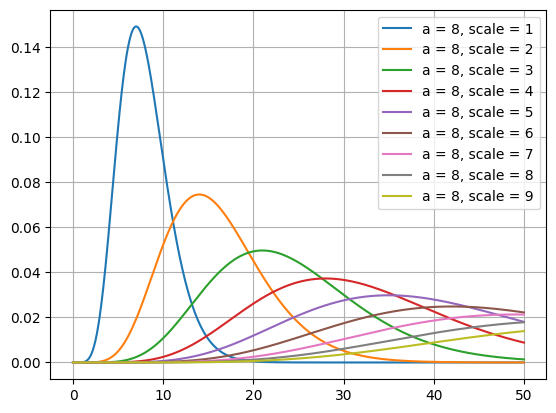

In [14]:
start = 1
end = 10

k = np.random.randint(1, 10)

x = np.linspace(0, 50, sample_size)
# plt.xlim(x.min(), x.max())
for scale in range(start,end):
    y = stats.gamma.pdf(x, a=k, scale=scale)
    plt.plot(x, y)
plt.legend((f"a = {k}, scale = " + pd.Series(np.arange(1,end)).astype('str')).values, loc="best")
plt.grid()

## Chi-Sqaure Distribution

If $Z_1,Z_2,Z_3,...,Z_k$ ~ $N(0,\,1)$ and $Z_{k}$ are independent
then <br/>
> $X\,=\,Z_1^2+Z_2^2+Z_3^2+\,...+Z_k^2$<br/>
>
> $X$ ~ $\chi^2(k),\,\,\,\,\,\,\,k:degree\,of\,freedom$<br/>
>
> $\begin{aligned}\Gamma(\frac{k}{2},2) \equiv \chi^2(k)\end{aligned}$

### pdf(probability density function)
$\begin{aligned}P(X=x)=f(x;k)=\frac{1}{2^{\frac{k}{2}}\,\Gamma(\frac{k}{2})}x^{\frac{k}{2}-1}e^{-\frac{x}{2}}\end{aligned}$ 

> $\begin{aligned}\Gamma(n)\,=\,(n\,-\,1)!\end{aligned}$ <br/><br/>
> $\begin{aligned}\Gamma(z)\,=\,\int_{0}^{\infty}x^{z\,-\,1}e^{-x}\,dx\,,\,\,\,\,Re(z)\gt0\end{aligned}$

<br/>
$E(X) = k$
<br/>
<br/>
$V(X) = 2k$


mean: 10, variance: 20

mean: 10.125841161046003, variance: 19.22822505632754
median: 9.569684078828857
variance: 19.22822505632754
standard variation: 4.385000006422753
range: [1.177,34.831]
IQR: [ 6.9634466  12.65771744]
25 Percentile: 6.963446597865246
50 Percentile: 9.569684078828857
75 Percentile: 12.65771744213833
skewness: 0.8176462569615284
kurtosis: 1.2139511312861995


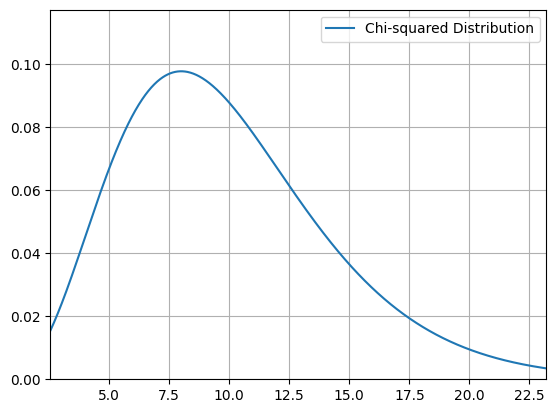

In [3]:
# Chi-squared Distribution
# X ~ chi2(k)
dof = 10
k = dof
sample_size = 1000
random_seed = 123

sample_chi2 = stats.chi2.rvs(k, size=sample_size, random_state=random_seed)

print_ideal_info(mean = k, variance = 2 * k)
print_sample_info(sample_chi2)

x = np.linspace(
    stats.chi2.ppf(0.01, k), 
    stats.chi2.ppf(0.99, k), 
    sample_size
)
y = stats.chi2.pdf(x, k)

print_pdf_figure(x=x, y=y, name="Chi-squared Distribution")

## t Distribution

If $Z$ ~ $N(0,\,1)$ and $X$ ~ $\chi^2(k)$ and $X,\,Z\,\,are\,\,independent$
then <br/>
> $T\,=\,\frac{Z}{\sqrt{\frac{X}{k}}}$<br/>
>
> $T$ ~ $t(k),\,\,\,\,\,\,\,k:degree\,of\,freedom$

### pdf(probability density function)
$\begin{aligned}P(T=t)=f(t\,;k)=\frac{\Gamma(\frac{k+1}{2})}{\Gamma(\frac{k}{2})}\frac{1}{\sqrt{k\pi}}\frac{1}{(1+\frac{t^2}{k})^{\frac{k+1}{2}}}\,,\,\,\,\,\,(-\infty\lt t \lt \infty)\end{aligned}$

> $\begin{aligned}\Gamma(n)\,=\,(n\,-\,1)!\end{aligned}$ <br/><br/>
> $\begin{aligned}\Gamma(z)\,=\,\int_{0}^{\infty}x^{z\,-\,1}e^{-x}\,dx\,,\,\,\,\,Re(z)\gt0\end{aligned}$

<br/>
$E(X) = 0$
<br/>
<br/>
$\begin{aligned}V(X) = \frac{k}{k-2}\,,\,\,\,\,\,(k \gt 2)\end{aligned}$


mean: 0, variance: 1.2857142857142858

mean: 0.028437230459665463, variance: 1.2616895044597913
median: 0.02309257911091328
variance: 1.2616895044597913
standard variation: 1.1232495290271842
range: [-3.671,3.807]
IQR: [-0.70063722  0.75907073]
25 Percentile: -0.7006372162202311
50 Percentile: 0.02309257911091328
75 Percentile: 0.7590707287107034
skewness: -0.024896625230753592
kurtosis: 0.5619222182059547


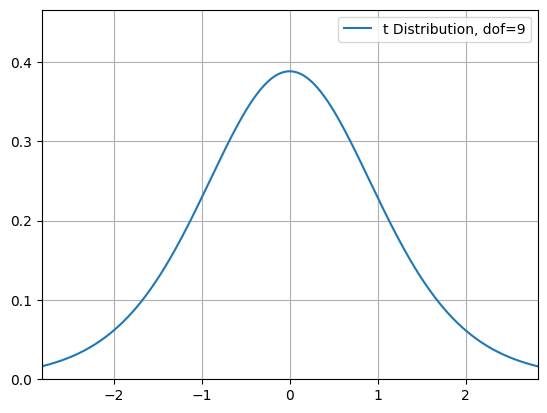

In [16]:
# t Distribution
# X ~ t(k)
dof = np.random.randint(3,10)
k = dof
sample_size = 1000
random_seed = 123

sample_t = stats.t.rvs(k, size=sample_size, random_state=random_seed)

print_ideal_info(mean = 0, variance = k / (k - 2))
print_sample_info(sample_t)

x = np.linspace(
    stats.t.ppf(0.01, k), 
    stats.t.ppf(0.99, k), 
    sample_size
)
y = stats.t.pdf(x, k)

print_pdf_figure(x=x, y=y, name=f"t Distribution, dof={dof}")

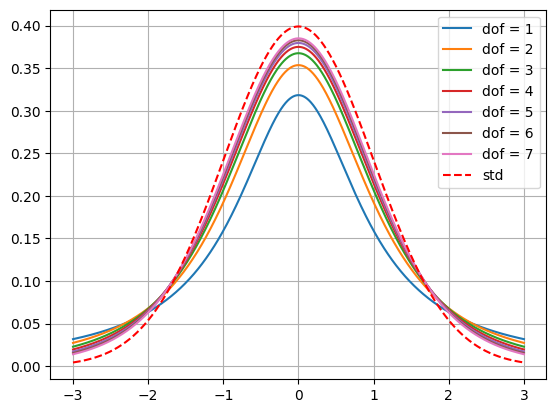

In [17]:
start = 1
end = 8

x = np.linspace(-3, 3, sample_size)
for dof in range(start,end):
    y = stats.t.pdf(x, dof)
    plt.plot(x, y)
    
legend_list = (f"dof = " +  pd.Series(np.arange(start,end)).astype('str')).to_list()
legend_list.append("std")

y = stats.norm.pdf(x)
plt.plot(x, y, "r--")

plt.legend(legend_list, loc="best")
plt.grid()

## F Distribution

If $U$ ~ $\chi^2(k_1)$ and $V$ ~ $\chi^2(k_2)$ and $U,\,V\,\,are\,\,independent$
then <br/>
> $\begin{aligned}X\,=\,\frac{\frac{U}{k_1}}{\frac{V}{k_2}}\end{aligned}$<br/>
>
> $X$ ~ $F(k_1,k_2)$

##### corollary
> if $X$ ~ $t(k)$, then $X^2$ ~ $F(1,k)$

### pdf(probability density function)
$\begin{aligned}P(X=x)=f(x\,;k_1,k_2)=\frac{\Gamma(\frac{k_1+k_2}{2})}{\Gamma(\frac{k_1}{2})\Gamma(\frac{k_2}{2})}\,(\frac{k_1}{k_2})^{\frac{k_1}{2}}\,x^{\frac{k_1}{2}-1}\,(1+\frac{k_1}{k_2}x)^{-\frac{1}{2}(k_1+k_2)}\,,\,\,\,\,\,(x \gt 0)\end{aligned}$

> $\begin{aligned}\Gamma(n)\,=\,(n\,-\,1)!\end{aligned}$ <br/><br/>
> $\begin{aligned}\Gamma(z)\,=\,\int_{0}^{\infty}x^{z\,-\,1}e^{-x}\,dx\,,\,\,\,\,Re(z)\gt0\end{aligned}$

<br/>
$\begin{aligned}E(X) = \frac{k_2}{k_2-2},\,\,\,\,k_2\gt2\end{aligned}$
<br/>
<br/>
$\begin{aligned}V(X) = \frac{2\,k_2^{2}\,(k_1+k_2-2)}{k_1\,(k_2-2)^2\,(k_2-4)},\,\,\,\,k_2\gt4\end{aligned}$


mean: 1.1538461538461537, variance: 0.2870206716360562

mean: 1.149953393584835, variance: 0.28202064515241515
median: 1.023627743672916
variance: 0.28202064515241515
standard variation: 0.5310561600738807
range: [0.306,5.294]
IQR: [0.78752622 1.36788829]
25 Percentile: 0.7875262216719349
50 Percentile: 1.023627743672916
75 Percentile: 1.3678882938338122
skewness: 2.251981524291761
kurtosis: 10.433832202991173


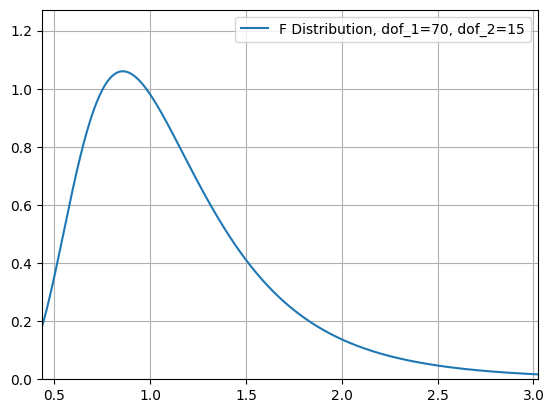

In [18]:
# F Distribution
# X ~ F(k1, k2)

min_dof_value = 5
max_dof_value = 100
random_range = np.abs(max_dof_value - min_dof_value)

dof_array = (np.random.random_sample(2) * random_range + min_dof_value).astype('int')
dof_1 = dof_array[0]
# dof_1 = 1
dof_2 = dof_array[1]

k1 = dof_1
k2 = dof_2
sample_size = 1000
random_seed = 123

sample_f= stats.f.rvs(k1, k2, size=sample_size, random_state=random_seed)

print_ideal_info(mean = k2 / (k2 - 2), variance = 2 * (k2 ** 2) * (k1 + k2 - 2) / k1 / ((k2 - 2) ** 2) / (k2 - 4))
print_sample_info(sample_f)

x = np.linspace(
    stats.f.ppf(0.01, k1, k2), 
    stats.f.ppf(0.99, k1, k2), 
    sample_size
)
y = stats.f.pdf(x, k1, k2)

print_pdf_figure(x=x, y=y, name=f"F Distribution, dof_1={k1}, dof_2={k2}")

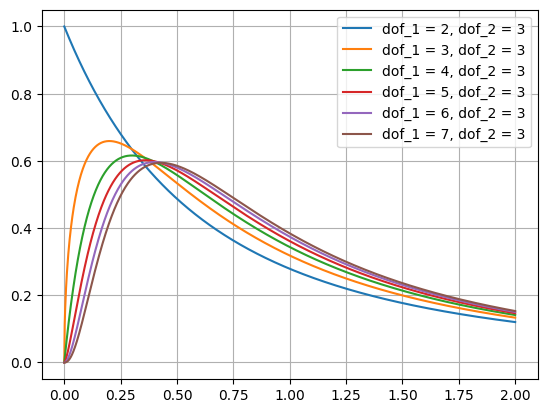

In [19]:
start = 2
end = 8

max_dof_value = 10

dof_2 = np.random.randint(1, max_dof_value + 1)
x = np.linspace(0, 2, sample_size)
for dof_1 in range(start,end):
    y = stats.f.pdf(x, dof_1, dof_2)
    plt.plot(x, y)
plt.legend((f"dof_1 = " +  pd.Series(np.arange(start,end)).astype('str')).values + f", dof_2 = {dof_2}", loc="best")
plt.grid()

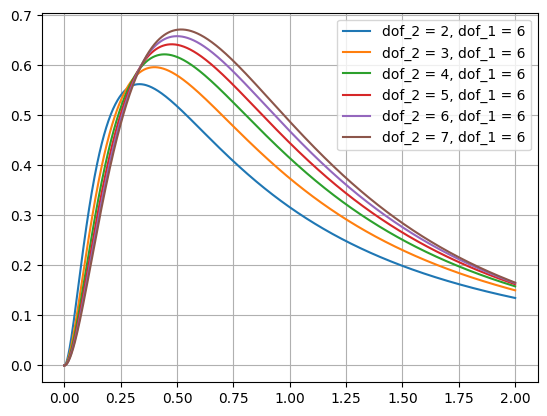

In [20]:
start = 2
end = 8

max_dof_value = 10

dof_1 = np.random.randint(1,max_dof_value)
x = np.linspace(0, 2, sample_size)
for dof_2 in range(start,end):
    y = stats.f.pdf(x, dof_1, dof_2)
    plt.plot(x, y)
plt.legend((f"dof_2 = " +  pd.Series(np.arange(start,end)).astype('str')).values + f", dof_1 = {dof_1}", loc="best")
plt.grid()